In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,922 cases (7 day average) as of Sun 25 Apr, -51.0 since Sat 24 Apr
112 hospitalised (7 day average) as of Tue 27 Apr, +4.3 since Mon 26 Apr
13 died (7 day average) as of Sun 25 Apr, -0.6 since Sat 24 Apr


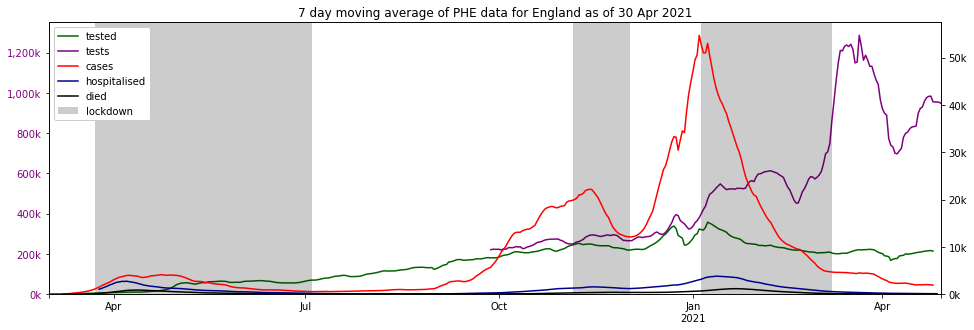

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

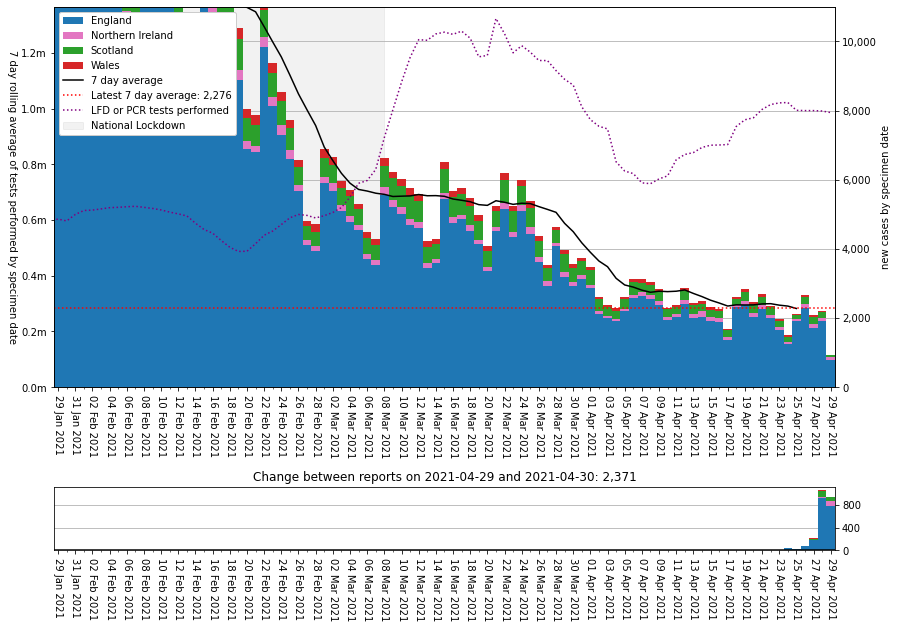

In [4]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

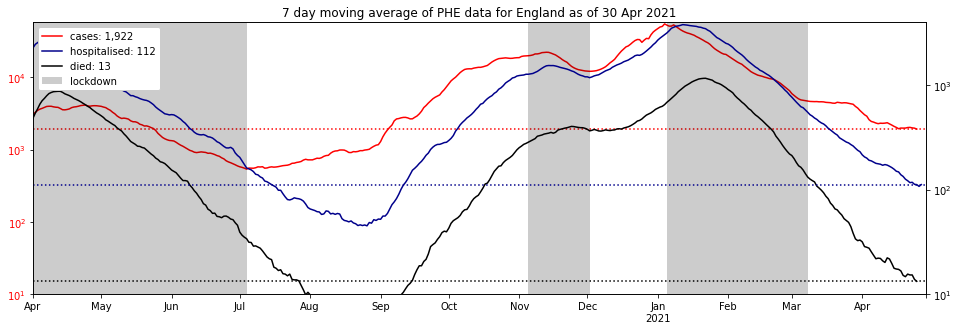

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

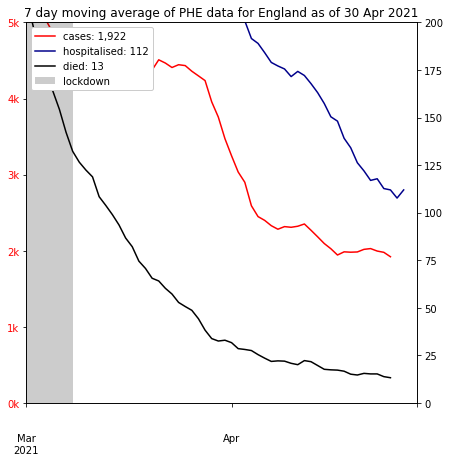

In [6]:
plot_summary(earliest_date='2021-03-01', show_latest=True, figsize=(7, 7),
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=5_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=200)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,29 Apr 21,"+12,144,430","+28,656,174","+12,144,430","+395,043","+110,976","+395,043"
Northern Ireland,29 Apr 21,"+414,884","+926,797","+414,884","+37,582","-8,792","+37,582"
Scotland,29 Apr 21,"+1,224,861","+2,802,152","+1,224,861","+40,232","+5,342","+40,232"
Wales,29 Apr 21,"+748,700","+1,830,964","+748,700","+16,057","+14,513","+16,057"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,12144430.0,28656174.0,16511744.0,56286961,21.575921,29.334936,49.089143
1,Northern Ireland,N92000002,414884.0,926797.0,511913.0,1893667,21.909026,27.032894,51.058079
2,Scotland,S92000003,1224861.0,2802152.0,1577291.0,5463300,22.419801,28.870664,48.709535
3,Wales,W92000004,748700.0,1830964.0,1082264.0,3152879,23.746550,34.326214,41.927235


'partial: 34,216,087 (51.2%), full: 14,532,875'

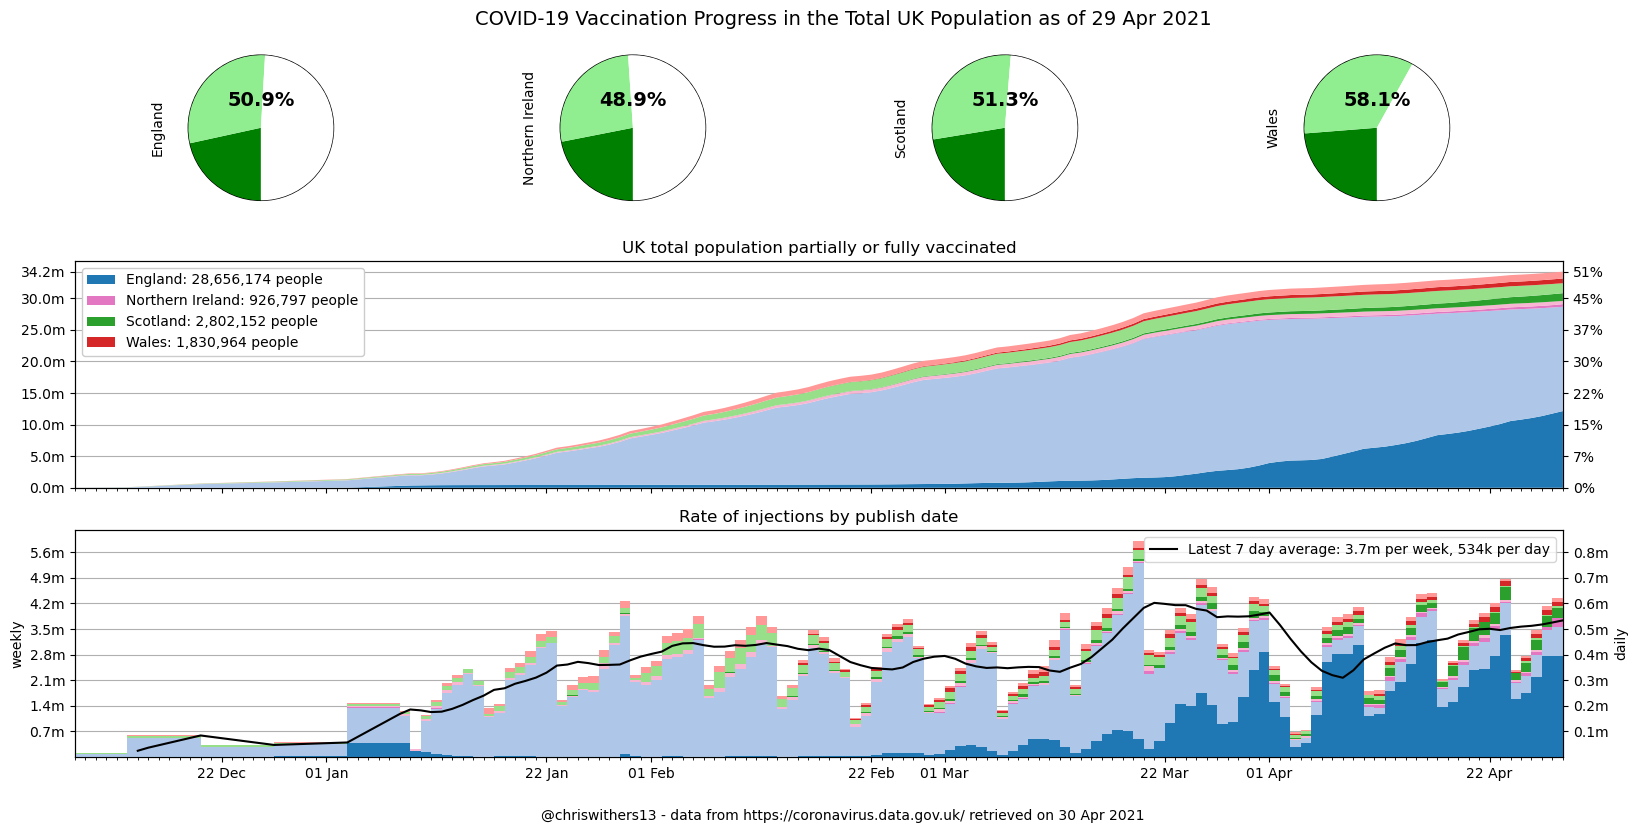

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

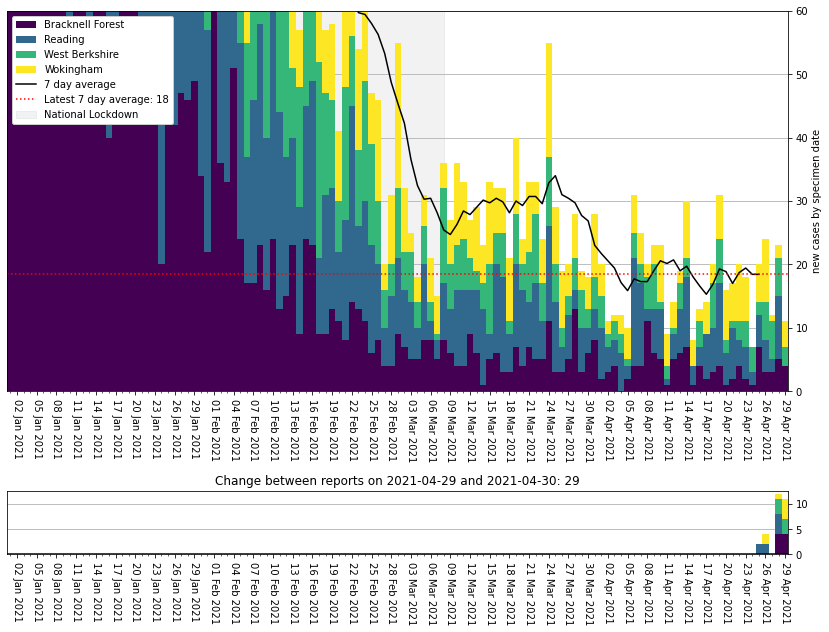

In [9]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=60)

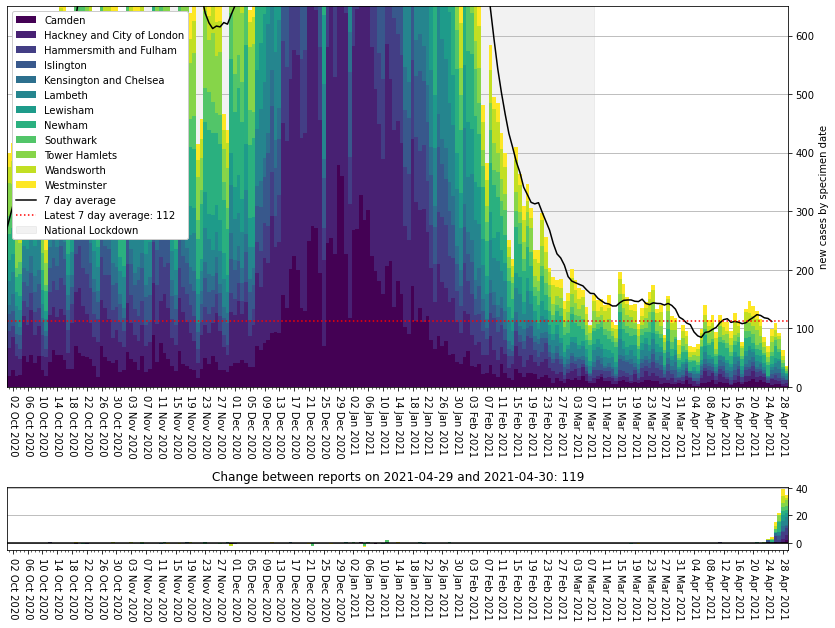

In [10]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000120,Hyndburn,123.391286,100.0,2021-04-29
N09000005,Derry City and Strabane,79.982021,121.0,2021-04-29
E06000013,North Lincolnshire,67.907970,117.0,2021-04-29
N09000009,Mid Ulster,67.327373,100.0,2021-04-29
E07000169,Selby,67.314059,61.0,2021-04-29
S12000020,Moray,56.355667,54.0,2021-04-29
E08000001,Bolton,56.338028,162.0,2021-04-29
E08000036,Wakefield,55.697191,194.0,2021-04-29
E08000016,Barnsley,54.685538,135.0,2021-04-29


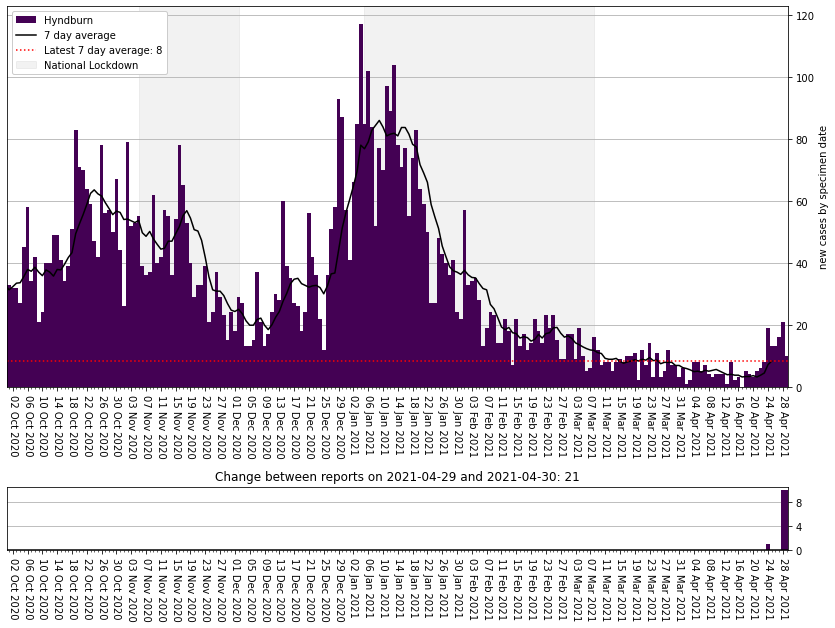

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,36.185334,287.0,2021-04-29
E08000032,Bradford,45.018674,243.0,2021-04-29
E08000034,Kirklees,53.662341,236.0,2021-04-29
E08000019,Sheffield,36.932357,216.0,2021-04-29
E08000036,Wakefield,55.697191,194.0,2021-04-29
E08000025,Birmingham,16.465000,188.0,2021-04-29
E08000017,Doncaster,54.506396,170.0,2021-04-29
S12000049,Glasgow City,26.851150,170.0,2021-04-29
E08000003,Manchester,29.664037,164.0,2021-04-29


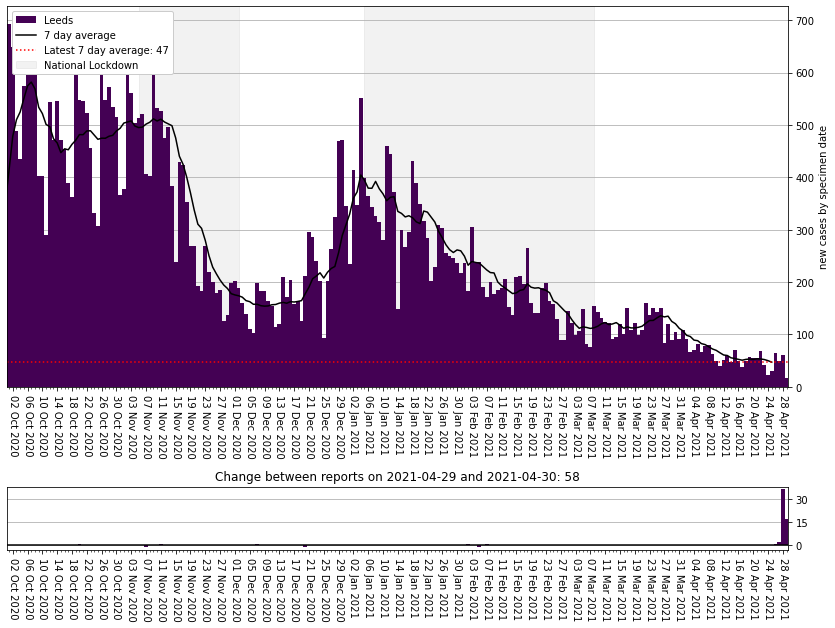

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 0.7
phe_max = 0.13

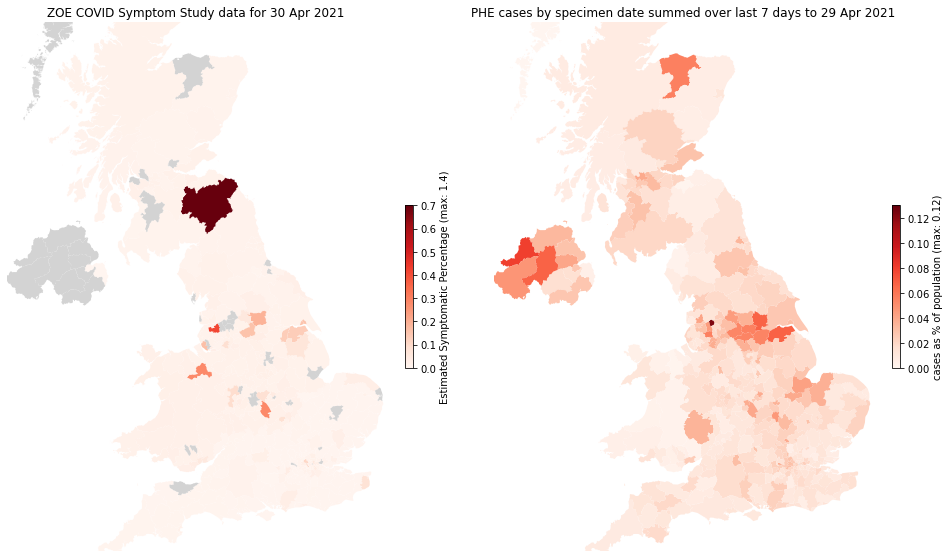

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...